In [1]:
from goofit import *
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
from math import sqrt
import numpy as np

In [2]:
import goofit

In [3]:
print_goofit_info()

GooFit: Version 2.3.0 (release) Commit: 
OMP: Number of threads: 40


## Setting constants

In [4]:
B_MASS = 5.27934 #GeV
k_MASS = 0.493677 #GeV
smin = 4*k_MASS*k_MASS #GeV^2
smax = (B_MASS-k_MASS)**2  #GeV^2 
nBins = 300

In [5]:
s12 = Observable("s12",smin,smax)
s13 = Observable("s13",smin,smax)
eventNumber = EventNumber("eventNumber")

s12.setNumBins(nBins)
s13.setNumBins(nBins)

Mother_Mass = Variable("Mother_Mass",B_MASS)
Daughter1_Mass = Variable("Daughter1_Mass",k_MASS)
Daughter2_Mass = Variable("Daughter2_Mass",k_MASS)
Daughter3_Mass = Variable("Daughter3_Mass",k_MASS)

B2KKK = DecayInfo3()
B2KKK.motherMass = B_MASS
B2KKK.daug1Mass = k_MASS
B2KKK.daug2Mass = k_MASS
B2KKK.daug3Mass = k_MASS
B2KKK.meson_radius = 1.5
B2KKK.mother_meson_radius = 5.0

constantOne = Variable("constantOne", 1)
constantZero = Variable("constantZero", 0)

## Phase space info

In [6]:
print(s12)
print(s13)

s12: 0 (300 bins) [0.974868, 22.9026]
s13: 0 (300 bins) [0.974868, 22.9026]


## Signal PDF

In [7]:
def makePolyEff():
    observables = (s12,s13)
    offsets = (constantZero,constantZero,)
    coefficients = (constantOne,)
    
    return PolynomialPdf("constantEff", observables, coefficients, offsets, 0)

In [8]:
def makesignal(eff):
    phi_re = Variable("phi_re",1.)
    phi_im = Variable("phi_im",0.)
    phi_mass = Variable("phi_mass",1.019460)
    phi_width = Variable("phi_width",0.004247)
    
    f2p_re = Variable("f2p_re",0.,0.01,0,0)
    f2p_im = Variable("f2p_im",1.,0.01,0,0)
    f2p_mass = Variable("f2p_mass",1.5245)
    f2p_width = Variable("f2p_width",0.0733158) 
    
    nr_re = Variable("nr_re",1.,0.01,0,0)
    nr_im = Variable("nr_im",0.,0.01,0,0)
    
    phi = Resonances.RBW("phi",phi_re,phi_im,phi_mass,phi_width,1,PAIR_12,True,True)
    f2p = Resonances.RBW("f2",f2p_re,f2p_im,f2p_mass,f2p_width,2,PAIR_12,True,True)
    nr = Resonances.NonRes("nr",nr_re,nr_im)
    
    B2KKK.resonances = (phi,f2p,nr)
    
    d = Amp3Body("signalPDF", s12, s13, eventNumber, B2KKK, eff)
    
    return d

## Signal with veto

In [9]:
def veto():
    DMass = 1.86966 #GeV
    veto_12 = VetoInfo(Variable("veto_min_12",(DMass-k_MASS)**2),Variable("veto_max_12",smax),PAIR_12)
    veto_13 = VetoInfo(Variable("veto_min_13",(DMass-k_MASS)**2),Variable("veto_max_13",smax),PAIR_13)
    vetos = [veto_12,veto_13]
    return DalitzVetoPdf("veto", s12, s13, Mother_Mass, Daughter1_Mass, Daughter2_Mass, Daughter3_Mass, vetos)
    

In [10]:
def makesignalwithveto(eff):
    phi_re = Variable("phi_re",1.)
    phi_im = Variable("phi_im",0.)
    phi_mass = Variable("phi_mass",1.019460)
    phi_width = Variable("phi_width",0.004247)
    
    f2p_re = Variable("f2p_re",0.,0.01,0,0)
    f2p_im = Variable("f2p_im",1.,0.01,0,0)
    f2p_mass = Variable("f2p_mass",1.5245)
    f2p_width = Variable("f2p_width",0.0733158) 
    
    nr_re = Variable("nr_re",1.,0.01,0,0)
    nr_im = Variable("nr_im",0.,0.01,0,0)
    
    phi = Resonances.RBW("phi",phi_re,phi_im,phi_mass,phi_width,1,PAIR_12,True,True)
    f2p = Resonances.RBW("f2",f2p_re,f2p_im,f2p_mass,f2p_width,2,PAIR_12,True,True)
    nr = Resonances.NonRes("nr",nr_re,nr_im)
    
    B2KKK.resonances = (phi,f2p,nr)
    
    observables = (s12,s13)
    offsets = (constantZero,constantZero)
    coefficients = (constantOne,)
    
    vetoDp = veto()
    
    effwithveto=ProdPdf("effwithveto",[vetoDp,eff])
    
    d = Amp3Body("signalPDFwithveto", s12, s13, eventNumber, B2KKK, effwithveto)
    
    return d

## Make toy and plotting

In [11]:
def maketoy(dp):
    print(B2KKK)
    prod   = ProdPdf("totalSignal",[dp])
    dplotted = DalitzPlotter(prod,dp)
    toyData = UnbinnedDataSet(s12,s13,eventNumber)
    dplotted.fillDataSetMC(toyData,100000)
    return toyData

In [12]:
def plot(toyData,name):
    plt.figure(0,figsize=(15,5))
    plt.subplot(1,3,1)
    plt.hist2d(toyData[0],toyData[1],bins=[100,100],norm=LogNorm())
    plt.subplot(1,3,2)
    plt.hist(toyData[0],bins=100,log=False)
    plt.subplot(1,3,3)
    plt.hist(toyData[1],bins=100,log=False)
    plt.savefig(name)
    plt.show()

## Filling toy sample

M=5.27934 GeV
m1=0.493677
GeV
m2=0.493677
m3=0.493677
rad=1.5
N res: 3


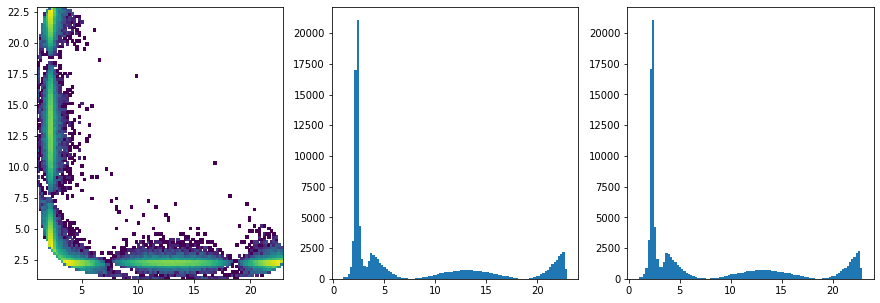

In [13]:
eff = makePolyEff()
dp = makesignal(eff)
toyData = maketoy(dp)
plot(toyData,"B2KKK_Simple_toyData.png")

## Initial Fit fractions

In [14]:
print("ff Laura++:")
print("phi = 0.344")
print("f'2 = 0.333")
print("NR = 0.326")
print("\n")

ffs = np.matrix(dp.fit_fractions(True))
print("ff interferences GooFit (%):")
print(ffs.view())

ff Laura++:
phi = 0.344
f'2 = 0.333
NR = 0.326


ff interferences GooFit (%):
[[ 2.71011037e-01  0.00000000e+00  0.00000000e+00]
 [ 6.92007467e-02  9.96574183e+01  0.00000000e+00]
 [ 8.53041477e-06 -4.48796766e-05  2.40624010e-03]]


## Fitting signal

In [15]:
prod   = ProdPdf("totalSignal",[dp])
prod.setData(toyData)
dp.setDataSize(toyData.getNumEvents())
fitter = FitManager(prod)
fitter.setVerbosity(1)
fitter.setMaxCalls(200000)
print('Running fit...')
func_min = fitter.fit()
print(dp.normalize())

Running fit...

  Valid         : yes
  Function calls: 98
  Minimum value : 604137.9912346557
  Edm           : 0.0000421262
  Internal parameters: 
    -0.0154229188
     1.0786952202
     2.3508326162
    -0.4826484501
  Internal covariance matrix: 
     0.00604726    -0.00001899    -0.00653814    -0.01224350
    -0.00001899     0.00160094     0.00368401    -0.00035347
    -0.00653814     0.00368401     0.48448251    -0.06525786
    -0.01224350    -0.00035347    -0.06525786     0.20695289
  External parameters: 
  Pos |    Name    |  type   |      Value       |    Error +/-
    0 |     phi_re |  const  |     1.0000000000 |            
    1 |     phi_im |  const  |     0.0000000000 |            
    2 |     f2p_re |  free   |    -0.0154229188 | 0.0549875453
    3 |     f2p_im |  free   |     1.0786952202 | 0.0282925503
    4 |      nr_re |  free   |     2.3508326162 | 0.4921801055
    5 |      nr_im |  free   |    -0.4826484501 | 0.3216775460
    6 |   phi_mass |  const  |     1.019

In [16]:
ffs = np.matrix(dp.fit_fractions(True))
print("ff interferences GooFit (%):")
print(ffs.view())

ff interferences GooFit (%):
[[ 2.32939297e-01  0.00000000e+00  0.00000000e+00]
 [ 6.29612328e-02  9.96900227e+01  0.00000000e+00]
 [ 1.98944251e-05 -1.59553682e-04  1.42164062e-02]]


M=5.27934 GeV
m1=0.493677
GeV
m2=0.493677
m3=0.493677
rad=1.5
N res: 3


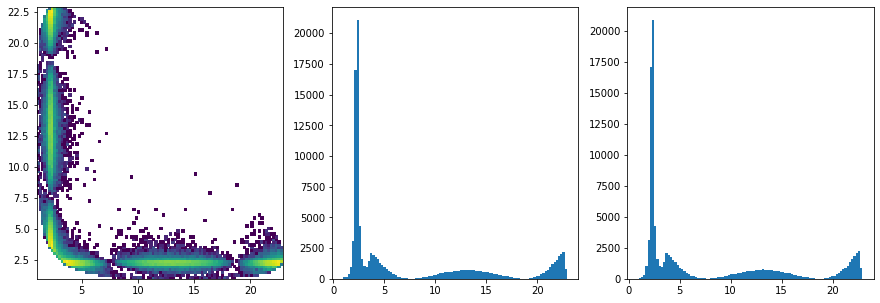

In [17]:
toyAfterFit = maketoy(dp)
plot(toyAfterFit,"B2KKK_Simple_toyData_after.png")

## Fitting signal with veto (Not Running)

In [ ]:
dpwithveto = makesignalwithveto(eff)
prodwithveto   = ProdPdf("totalSignal_withVeto",[dpwithveto])

In [ ]:
prodwithveto.setData(toyData)
dpwithveto.setDataSize(toyData.getNumEvents())
fitter = FitManager(prodwithveto)
fitter.setVerbosity(1)
fitter.setMaxCalls(200000)
print('Running fit...')
func_min = fitter.fit()

In [ ]:
ffs = np.matrix(dpwithveto.fit_fractions(True))
print("ff interferences GooFit (%):")
print(ffs.view())

In [ ]:
toyAfterFitWithVeto = maketoy(dpwithveto)
plot(toyAfterFitWithVeto)